# Lending Club Feature Selection

- https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from pathlib import Path

main_path = Path().absolute().parent.parent
data_path = main_path / 'data' / 'p2p' / 'lending_club'

## Data Description

```
$ wget https://resources.lendingclub.com/LCDataDictionary.xlsx -O ../data/lendingclub
```

In [2]:
# LoanStats, browseNotes, RejectStats
dic_loanstats = pd.read_excel(data_path / 'LCDataDictionary.xlsx', sheet_name='LoanStats', skipfooter=2)
dic_borrownotes = pd.read_excel(data_path / 'LCDataDictionary.xlsx', sheet_name='browseNotes', skipfooter=2)
dic_rejectstats = pd.read_excel(data_path / 'LCDataDictionary.xlsx', sheet_name='RejectStats')

df_acp = pd.read_csv( data_path / 'accepted_2007_to_2018Q4.csv' )
df_rej = pd.read_csv( data_path / 'rejected_2007_to_2018Q4.csv' )

<ipython-input-2-fc99abf7b7db>:6: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acp = pd.read_csv( data_path / 'accepted_2007_to_2018Q4.csv' )


In [3]:
p = df_acp['loan_status'].value_counts().reset_index().hvplot(
    kind='bar', x='index', y='loan_status', 
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350, yformatter='%d'
)
p.opts(xrotation=45)

:Bars   [index]   (loan_status)

In [4]:
df_acp = df_acp.loc[(df_acp['loan_status'] == 'Fully Paid') | (df_acp['loan_status'] == 'Charged Off')]

In [5]:
p = df_acp['loan_status'].value_counts().reset_index().hvplot(
    kind='bar', x='index', y='loan_status', 
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350, yformatter='%d'
)
p

:Bars   [index]   (loan_status)

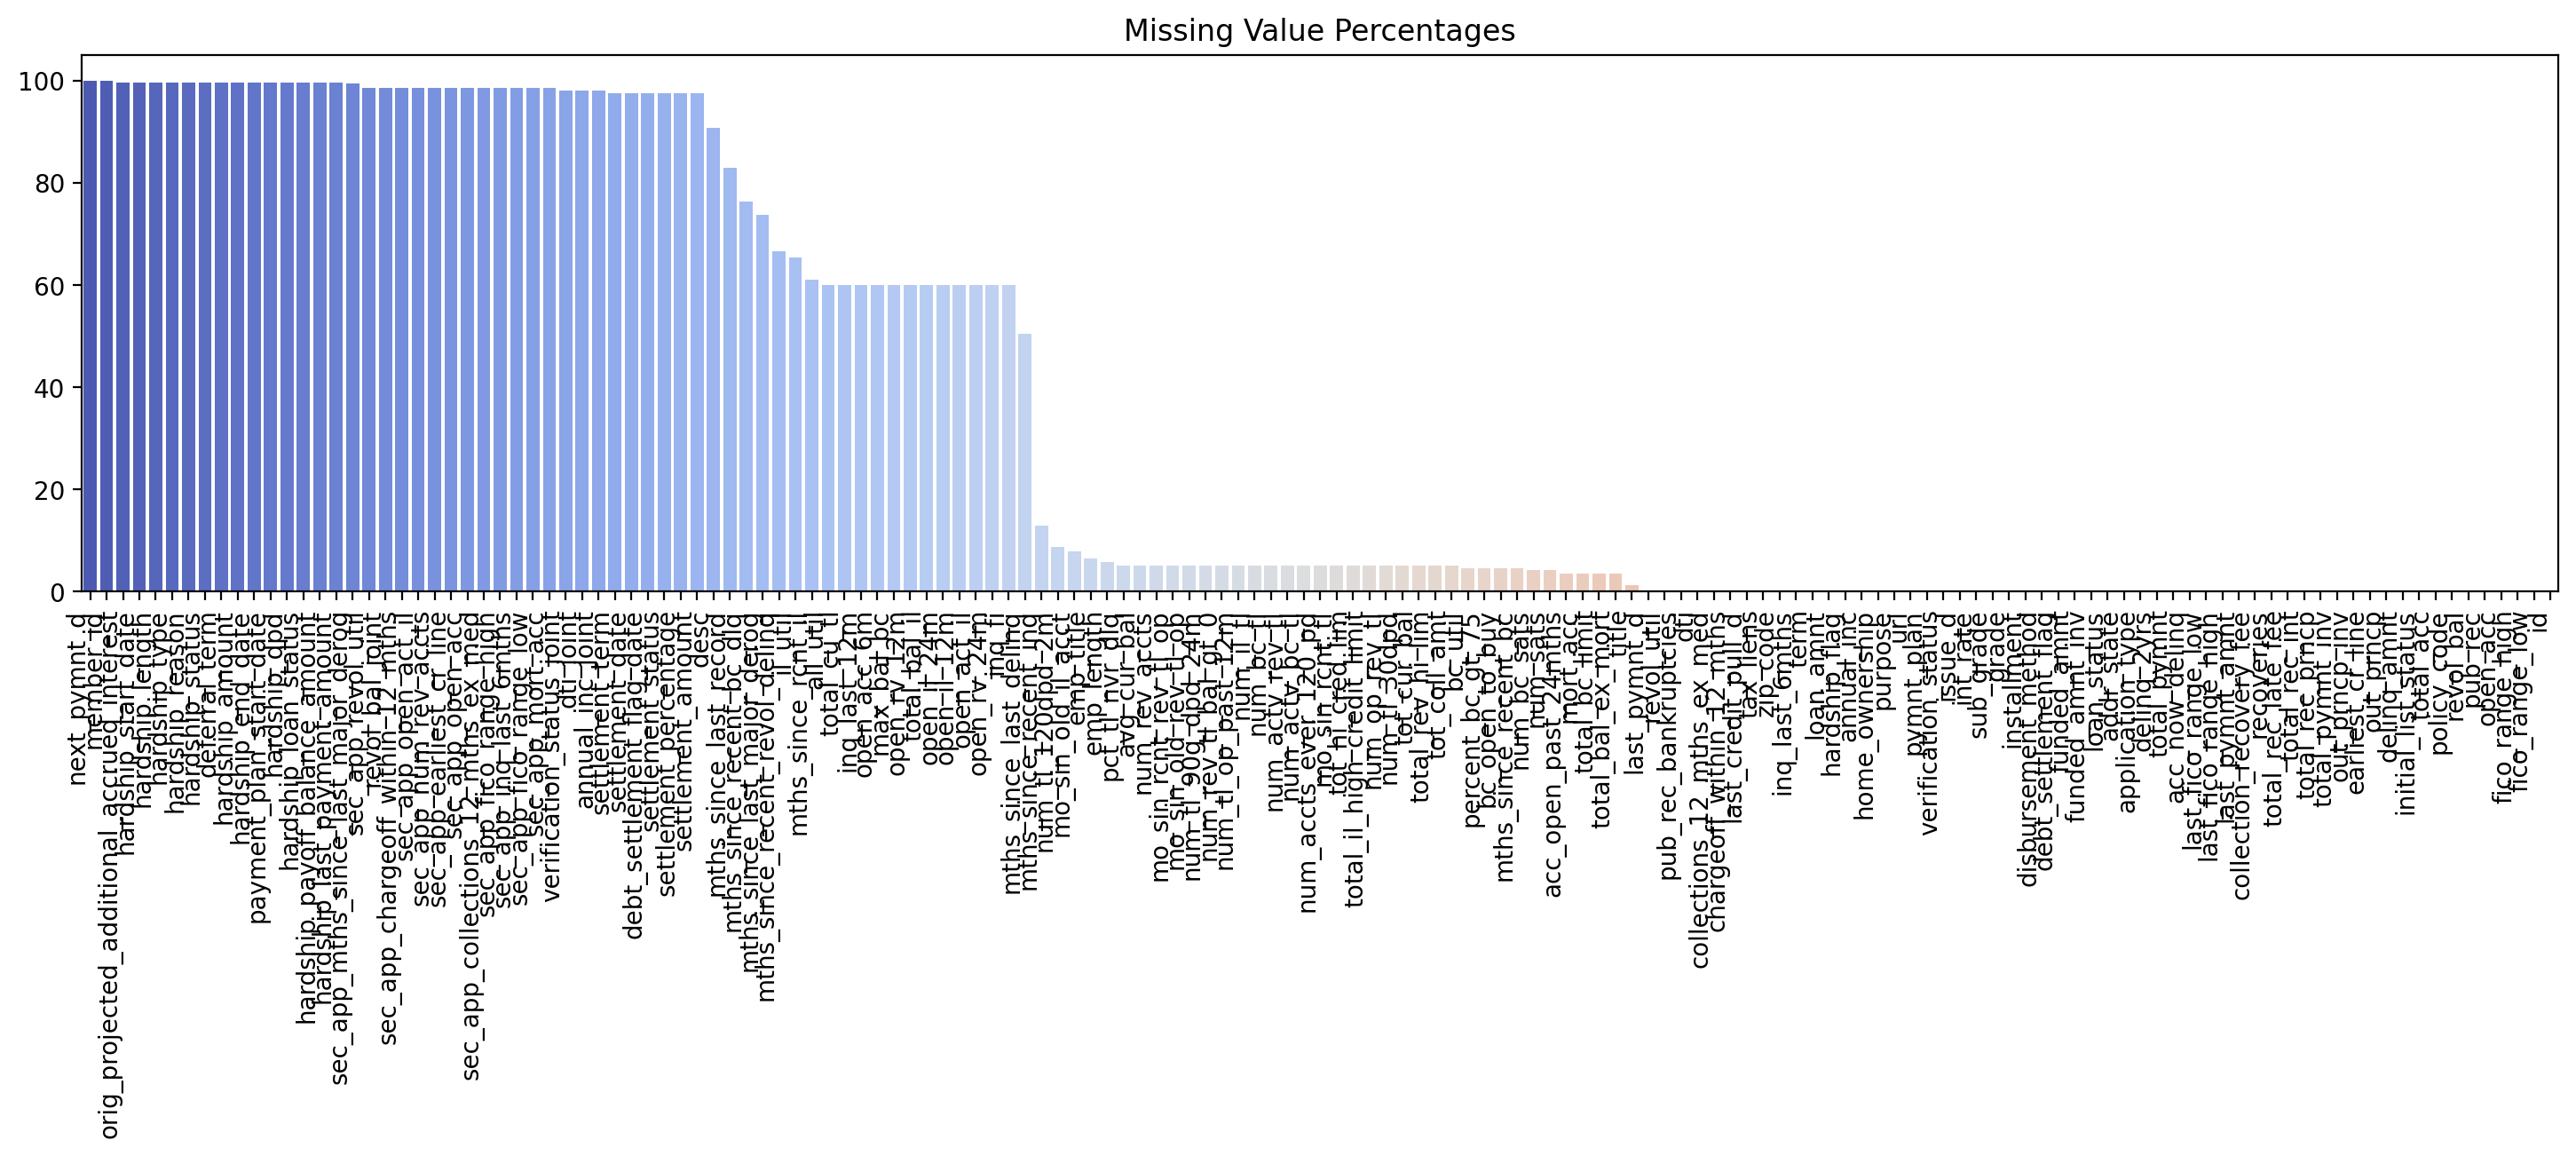

In [6]:
# see missing features

df_f_count = ((df_acp.isnull().sum()/len(df_acp))*100).sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(18, 4), dpi=200)
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=df_f_count, x=df_f_count.index, palette='coolwarm', ax=ax) 
ax.set_title("Missing Value Percentages")
plt.xticks(rotation=90, ha='right')
plt.show()

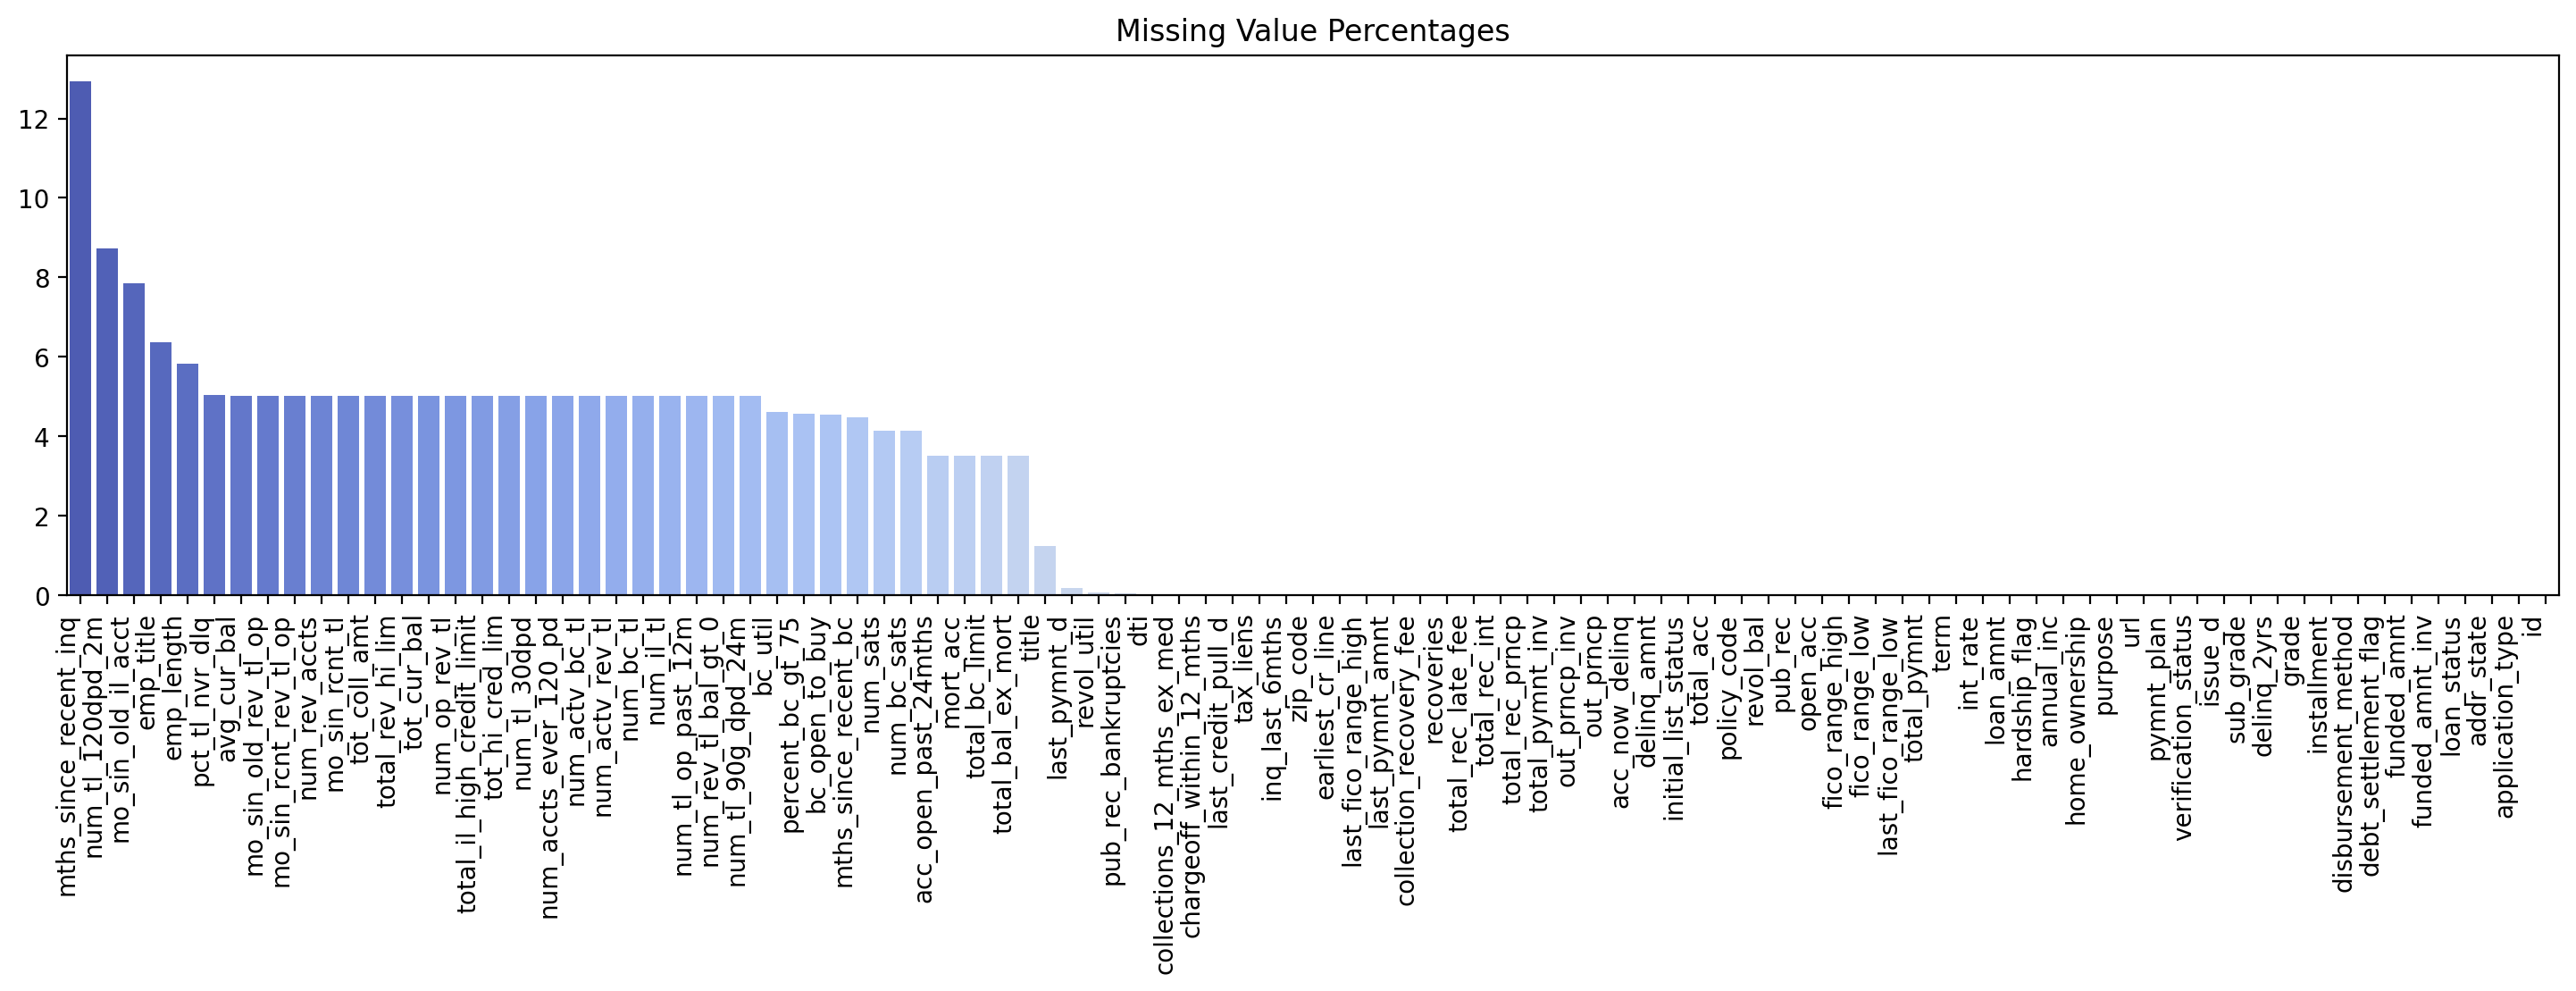

In [7]:
# drop 50% of features
# if there is domain expert will add some of these features
keep_feeatures = df_f_count[df_f_count <= 50].index.to_list()
df_acp = df_acp.loc[:, keep_feeatures]

# see missing features

df_f_count = ((df_acp.isnull().sum()/len(df_acp))*100).sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(18, 4), dpi=200)
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=df_f_count, x=df_f_count.index, palette='coolwarm', ax=ax) 
ax.set_title("Missing Value Percentages")
plt.xticks(rotation=90, ha='right')
plt.show()

In [10]:
features = [
    'loan_amnt', 'term', 'loan_status', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 
    'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'dti', 'earliest_cr_line', 
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
    'pub_rec_bankruptcies', 'addr_state'
]

# [
#     'funded_amnt',
#     'delinq_amnt',
#     'delinq_2yrs',

#     'fico_range_high',
#     'fico_range_low',
#     'last_fico_range_high',
#     'last_fico_range_low',

#     'last_pymnt_amnt',
#     'collection_recovery_fee',
#     'recoveries',
#     'total_rec_late_fee',
#     'total_rec_int',
#     'total_rec_prncp',
#     'total_pymnt_inv',
#     'total_pymnt',
#     'out_prncp_inv',
#     'out_prncp',
#     'acc_now_delinq',

#     'policy_code',

#     'hardship_flag',
#     'pymnt_plan',

#     'disbursement_method',
#     'debt_settlement_flag',
#     'funded_amnt',
#     'funded_amnt_inv'
# ]

In [11]:
df_acp = df_acp.loc[:, features]

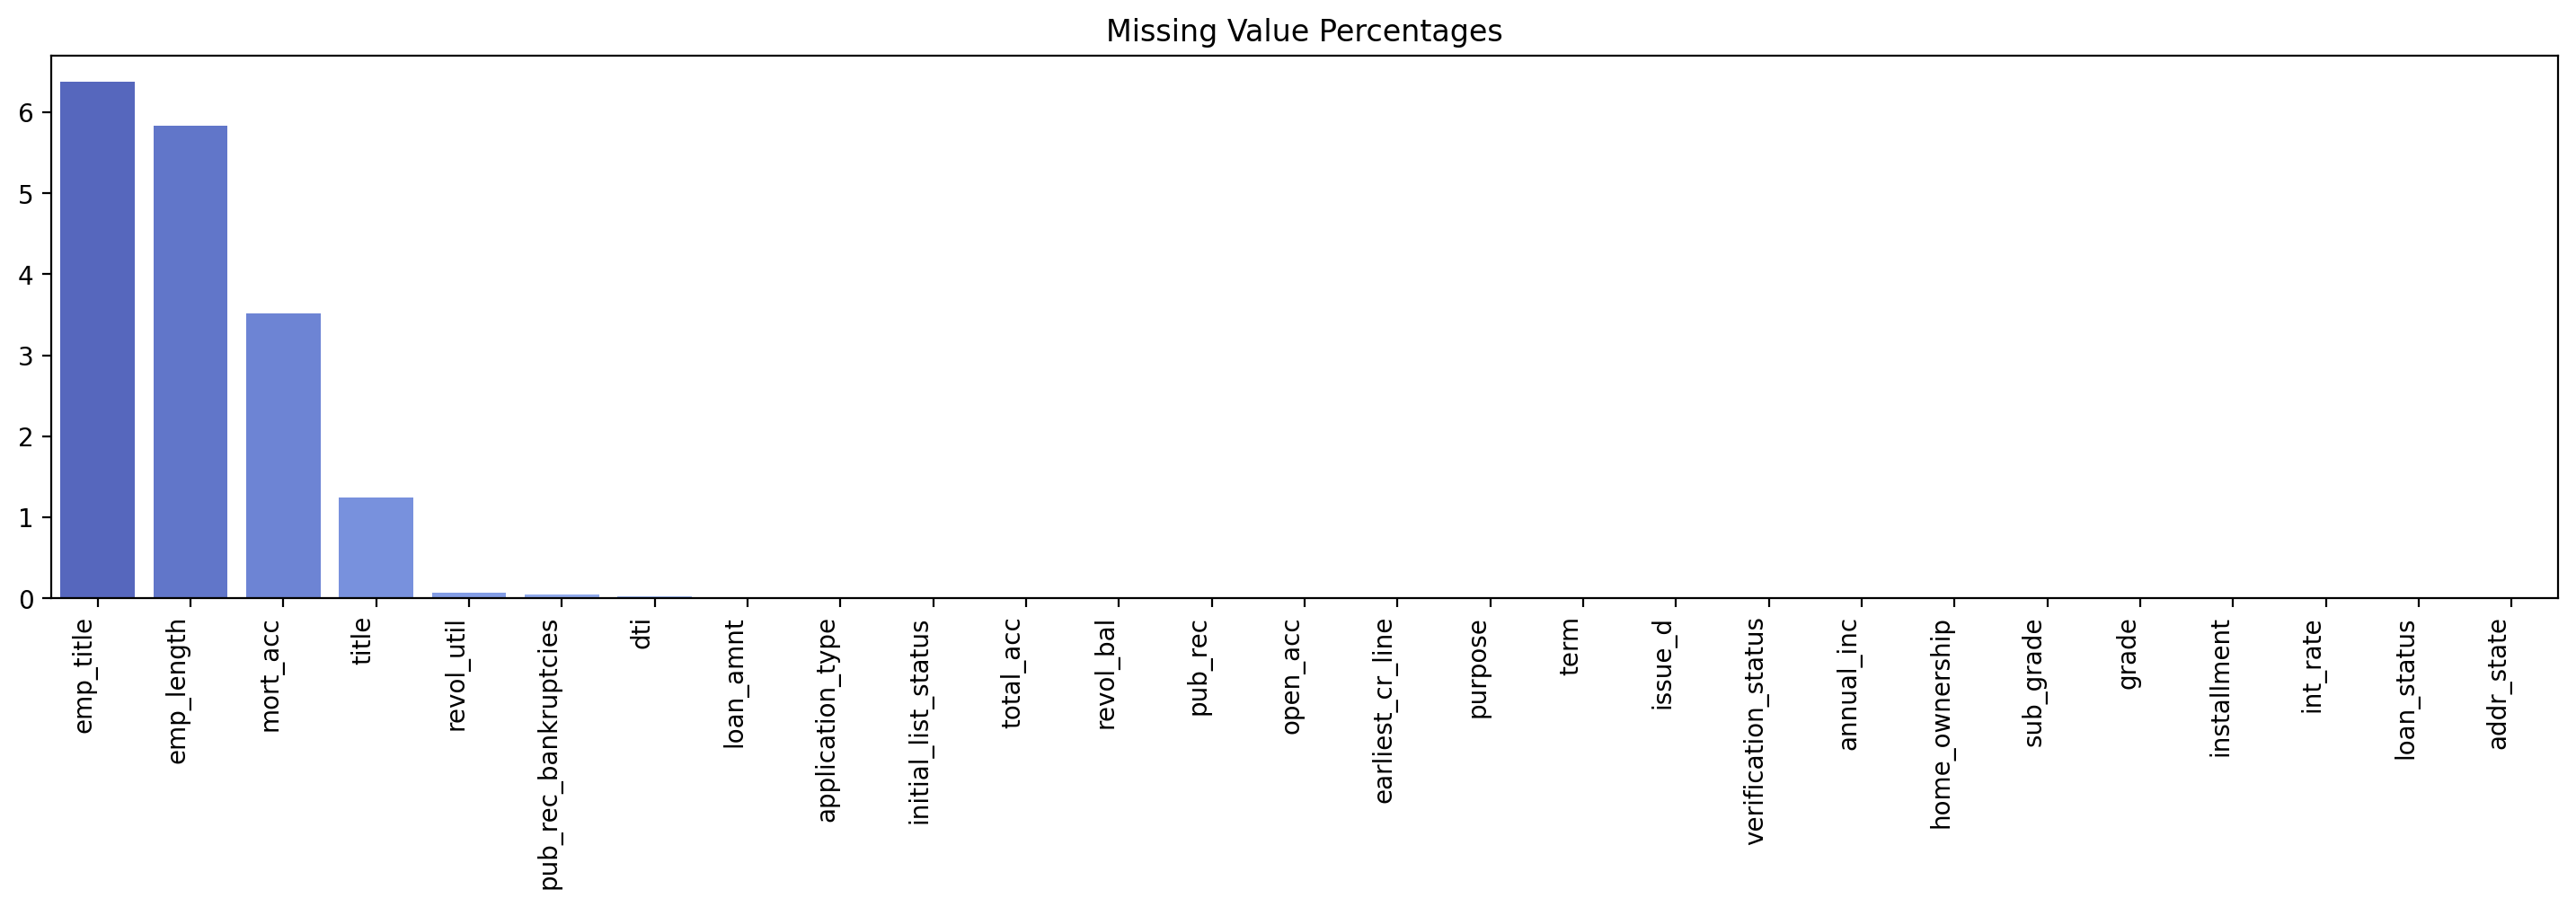

In [12]:
# see missing features

df_f_count = ((df_acp.isnull().sum()/len(df_acp))*100).sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(18, 4), dpi=200)
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=df_f_count, x=df_f_count.index, palette='coolwarm', ax=ax) 
ax.set_title("Missing Value Percentages")
plt.xticks(rotation=90, ha='right')
plt.show()

In [13]:
processed_path = data_path / 'processed' 
if not processed_path.exists():
    processed_path.mkdir()

df_acp.to_csv(processed_path / 'accepted.csv', index=False, encoding='utf-8')
dic_loanstats.loc[dic_loanstats['LoanStatNew'].isin(features), :].to_csv(processed_path / 'accepted_desc.csv', index=False, encoding='utf-8')

In [14]:
column_dict = {
    'Amount Requested': 'loan_amnt', 'Application Date': 'appli_date', 'Loan Title': 'loan_title', 
    'Risk_Score': 'risk_score', 'Debt-To-Income Ratio': 'dti_ratio', 'Zip Code': 'zip_code', 
    'State': 'addr_state', 'Employment Length': 'emp_length', 'Policy Code': 'policy_code'
}
df_rej = df_rej.rename(columns=column_dict)

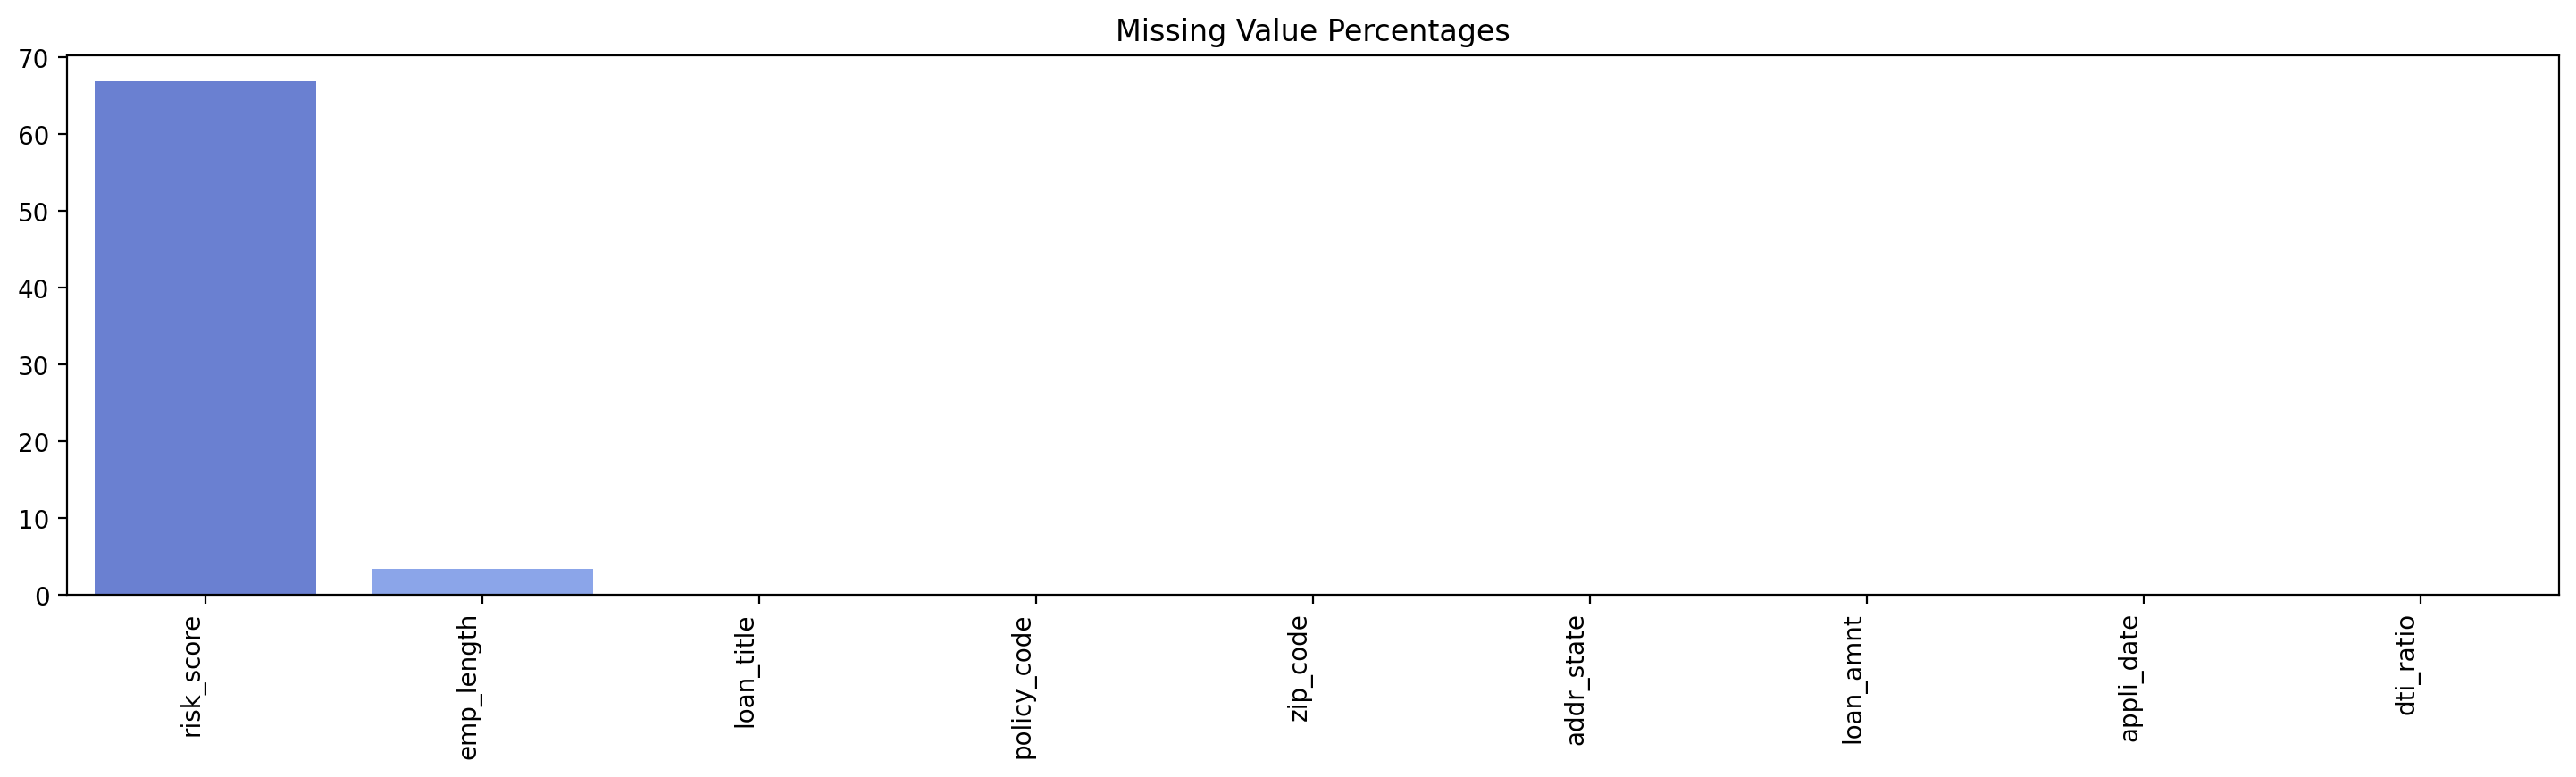

In [15]:
df_f_count = ((df_rej.isnull().sum()/len(df_rej))*100).sort_values(ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(18, 4), dpi=200)
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=df_f_count, x=df_f_count.index, palette='coolwarm', ax=ax) 
ax.set_title("Missing Value Percentages")
plt.xticks(rotation=90, ha='right')
plt.show()

In [16]:
df_rej.to_csv(processed_path / 'rejected.csv', index=False, encoding='utf-8')
dic_rejectstats['RejectStats'] = dic_rejectstats['RejectStats File'].map(column_dict)
dic_rejectstats.to_csv(processed_path / 'rejected_desc.csv', index=False, encoding='utf-8')